In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Gradient Boosting

In [2]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("accuracy on training set: %f" % gbrt.score(X_train, y_train))
print("accuracy on test set: %f" % gbrt.score(X_test, y_test))

accuracy on training set: 1.000000
accuracy on test set: 0.958042


In [3]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("accuracy on training set: %f" % gbrt.score(X_train, y_train))
print("accuracy on test set: %f" % gbrt.score(X_test, y_test))

accuracy on training set: 0.990610
accuracy on test set: 0.972028


In [4]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("accuracy on training set: %f" % gbrt.score(X_train, y_train))
print("accuracy on test set: %f" % gbrt.score(X_test, y_test))

accuracy on training set: 0.988263
accuracy on test set: 0.965035


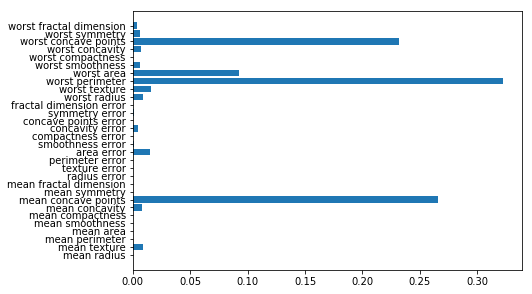

In [5]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plt.barh(range(cancer.data.shape[1]), gbrt.feature_importances_)
plt.yticks(range(cancer.data.shape[1]), cancer.feature_names);
ax = plt.gca()
ax.set_position([0.4, .2, .9, .9])

# Exercise
Use GradientBoostingRegressor on the Bike dataset.
Search over the ``learning_rate`` and ``max_depth`` using ``GridSearchCV``.
What happens if you change ``n_estimators``?

In [8]:
data=pd.read_csv('data/adult.csv',index_col=0)
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
income = data.income
data_features = data.drop("income", axis=1)
display(data_features.head())

### one hot encode data
data_one_hot = pd.get_dummies(data_features)
data_one_hot.head()

### Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_one_hot, income)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [10]:
### Cross-validation with default parameters
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

scores = cross_val_score(GradientBoostingClassifier(), X_train_scaled, y_train, cv=5)
print(scores.mean())

0.8661748256887494


In [11]:
GradientBoostingClassifier()

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [23]:
np.logspace(-0.5,0,5)


array([0.31622777, 0.4216965 , 0.56234133, 0.74989421, 1.        ])

In [21]:
from sklearn.model_selection import GridSearchCV
param_grid = {'learning_rate': [0.1,0.3]}
grid = GridSearchCV(GradientBoostingClassifier(random_state=0), 
                    param_grid=param_grid,
                    cv=5,
                   return_train_score=True)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.1, 0.3]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

Text(0.5, 0, 'param_learning_rate')

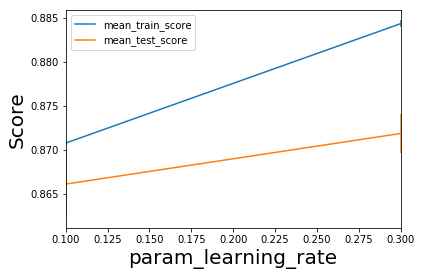

In [22]:
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_learning_rate', y='mean_train_score', yerr='std_train_score', ax=plt.gca())
scores.plot(x='param_learning_rate', y='mean_test_score', yerr='std_test_score', ax=plt.gca())
plt.ylabel('Score',fontsize=20)
plt.xlabel('param_learning_rate',fontsize=20)

In [ ]:
param_grid = {'max_depth': [2,5,10]}
grid = GridSearchCV(GradientBoostingClassifier(random_state=0), 
                    param_grid=param_grid,
                    cv=5,
                   return_train_score=True)

grid.fit(X_train, y_train)

In [ ]:
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_depth', y='mean_train_score', yerr='std_train_score', ax=plt.gca())
scores.plot(x='param_max_depth', y='mean_test_score', yerr='std_test_score', ax=plt.gca())
plt.ylabel('Score',fontsize=20)
plt.xlabel('param_max_depth',fontsize=20)

In [ ]:
param_grid = {'n_estimators': [2,5,10]}
grid = GridSearchCV(GradientBoostingClassifier(random_state=0), 
                    param_grid=param_grid,
                    cv=5,
                   return_train_score=True)

grid.fit(X_train, y_train)

In [ ]:
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_n_estimators', y='mean_train_score', yerr='std_train_score', ax=plt.gca())
scores.plot(x='param_n_estimators', y='mean_test_score', yerr='std_test_score', ax=plt.gca())
plt.ylabel('Score',fontsize=20)
plt.xlabel('param_n_estimators',fontsize=20)